## Python Exercise : Simple Linear Regression

In [1]:
#Library

import statsmodels.api as sm
import seaborn as sns
from statsmodels.api import OLS
import matplotlib.pyplot as plt

### Load dataset tips

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## EDA

In [4]:
df = tips[['total_bill','tip']]
df

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [5]:
df.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


In [6]:
df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


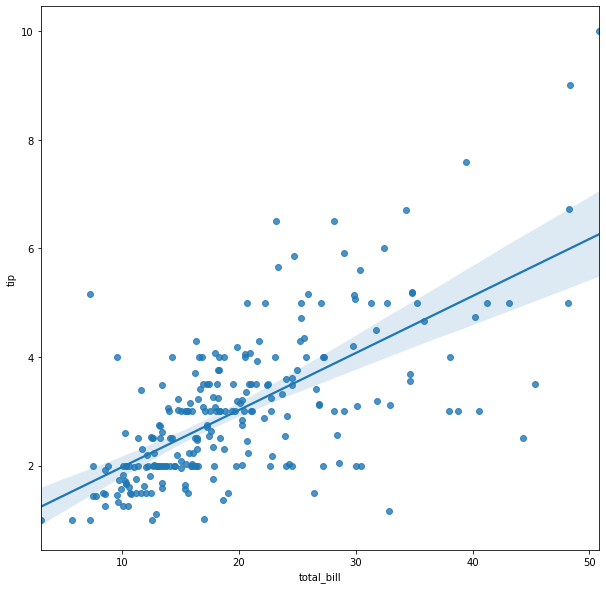

In [8]:
plt.figure(figsize=(10,10))
sns.regplot(x='total_bill',y='tip',data=df)
plt.show()

### Simple Linear Regression

In [9]:
sm_lm = OLS(df['tip'],sm.add_constant(df['total_bill']))
result = sm_lm.fit()

In [10]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        10:47:42   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

Total bill memiliki korelasi terhadap tip karena P < alpha (0.05)

Feature memiliki hub terhadap labels

In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

## FUNGSI STANDAR SCALER 

## UNTUK MENGUBAH MEAN KE 0 DAN STANDAR DEVIASI KE 1

In [19]:
scaler = StandardScaler()
std_df = df.copy()
scaler.fit(std_df)
std_df = scaler.transform(std_df)
std_df = pd.DataFrame(std_df,columns = df.columns)
std_df

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


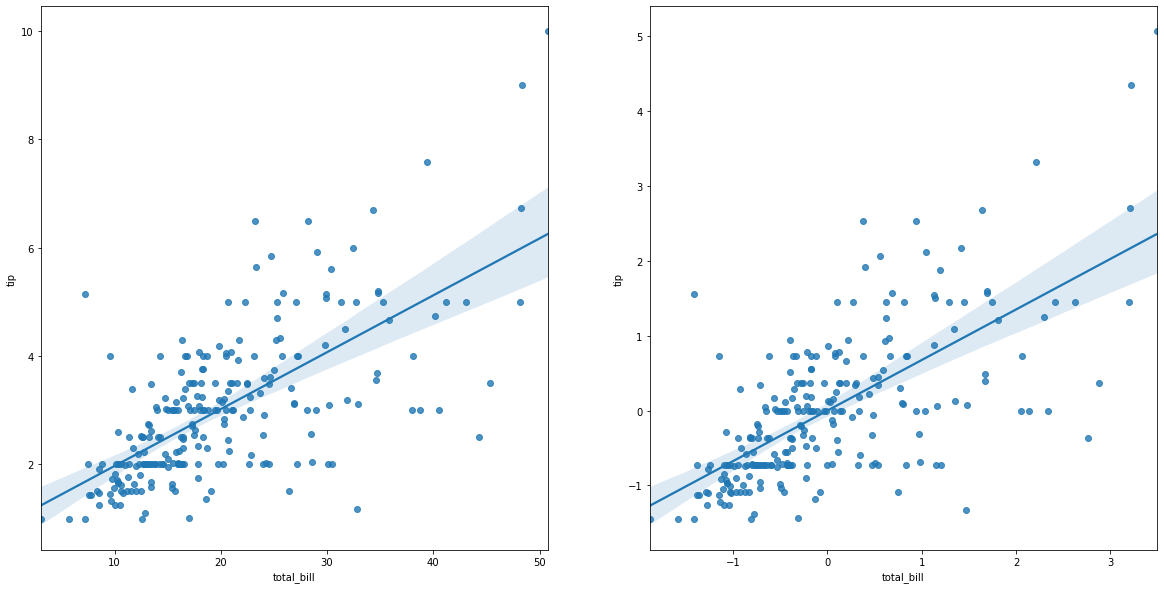

In [21]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.regplot(x='total_bill',y='tip',data=df)

plt.subplot(122)
sns.regplot(x='total_bill',y='tip',data=std_df)

plt.show()

In [22]:
std_df.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


### Cek menggunakan stats model yang STD Scaller

In [23]:
sm_lm_std = OLS(std_df['tip'],sm.add_constant(std_df['total_bill']))
result = sm_lm_std.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           6.69e-34
Time:                        10:58:51   Log-Likelihood:                -271.81
No. Observations:                 244   AIC:                             547.6
Df Residuals:                     242   BIC:                             554.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.81e-16      0.047   5.93e-15      1.0

## Coba hilangkan outliers (yang std_df tol bill & tips nya <-2 dan >2 itu outliers.) nnati coba hitung lagi r squared nya

In [29]:
std_df.describe()

,total_bill,tip
count,2.440000e+02,2.440000e+02
mean,-6.597637e-17,2.846297e-16
std,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00
25%,-7.247111e-01,-7.229713e-01
50%,-2.241005e-01,-7.117518e-02
75%,4.886857e-01,4.086192e-01
max,3.492068e+00,5.070772e+00


In [28]:
r_pearson = std_df.corr()['tip'][0]
std_bill = std_df.describe()['total_bill'][2]
std_tip = std_df.describe()['tip'][2]

r_pearson*(std_bill/std_tip)

0.6757341092113653

In [25]:
df.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


## CARA LAIN

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
x=tips[['total_bill']]
y=tips['tip']
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [36]:
b1 = lr.coef_
b1

array([0.10502452])

In [37]:
b0 = lr.intercept_
b0

0.9202696135546731

In [51]:
r2 = lr.score(x,y)
r2

0.45661658635167657

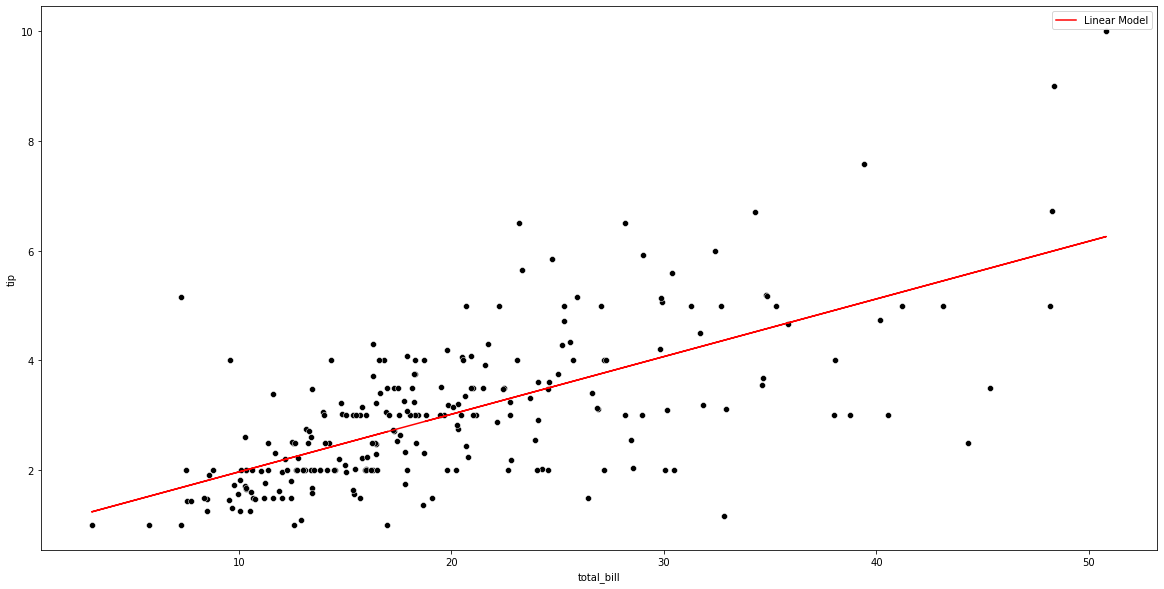

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='total_bill',y='tip',data=tips,color = 'black')
plt.plot(tips['total_bill'],[b0+(b1*x) for x in tips['total_bill']],color='red',label='Linear Model')
plt.legend()
plt.show()

In [49]:
y_pred = lr.predict(x)
tips['tip_prediction']=y_pred
tips.drop(columns=['prediction'],inplace=True)

In [50]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_prediction
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


## Ngecek std error

In [52]:
mse = mean_squared_error(tips['tip'],tips['tip_prediction'])
mse

1.036019442011377

In [53]:
rmse = np.sqrt(mse)
rmse

1.0178504025697377

In [54]:
tips['xi-mean']=tips['total_bill']-np.mean(tips['total_bill'])
tips

,total_bill,tip,sex,smoker,day,time,size,tip_prediction,xi-mean
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943


In [55]:
tips['(xi-mean)squared']=tips['xi-mean']**2
tips

,total_bill,tip,sex,smoker,day,time,size,tip_prediction,xi-mean,(xi-mean)squared
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,-2.795943,7.817295
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,-9.445943,89.225832
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1.224057,1.498316
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,3.894057,15.163683
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,4.804057,23.078967
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,9.244057,85.452597
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,7.394057,54.672084
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.884057,8.317787
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,-1.965943,3.864930


In [58]:
std_b1 = rmse/np.sqrt(np.sum(tips['(xi-mean)squared']))
std_b1

0.007334544177444975

## Ngecek t stats

In [60]:
tstats = b1/std_b1
tstats

array([14.31916079])

<img src = 'https://www.tdistributiontable.com/wp-content/uploads/2020/08/t-table.png'>